In [20]:
# 炎 Esteban Quintero Sotomayor - 20110388. 炎

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [6]:
dat = datasets.load_breast_cancer()
print(dat.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df_all = pd.DataFrame(dat['data'], columns=list(dat['feature_names']))
df_all.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
TEST_SIZE_RATIO = 0.3

x = df_all
y = pd.Series(list(dat['target']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = TEST_SIZE_RATIO, random_state=0)

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("x_train.shape, y_train.shape", x_train.shape, y_train.shape)
print("x_test.shape, y_test.shape", x_test.shape, y_test.shape)

x_train.shape, y_train.shape (398, 30) (398,)
x_test.shape, y_test.shape (171, 30) (171,)


C:\Users\esteb\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\esteb\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\esteb\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [9]:
model = LogisticRegression(random_state=0).fit(x_train, y_train)
print("Training score: ", f1_score(y_train, model.predict(x_train)))
print("Testing score: ", f1_score(y_test, model.predict(x_test)))

Training score:  0.99203187250996
Testing score:  0.981651376146789


Function correlation_matrix: x_shape, y_shape, yX_shape (569, 30) (569,) (569, 31)



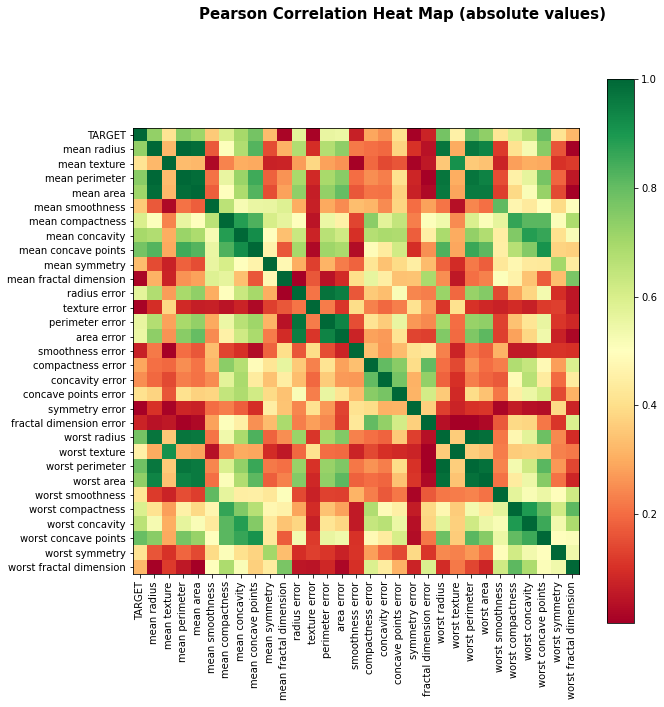

In [13]:
def correlation_matrix(y, x, is_plot=False):
    yX = pd.concat([y, x], axis=1)
    yX = yX.rename(columns={0: 'TARGET'})
    
    print("Function correlation_matrix: x_shape, y_shape, yX_shape", x.shape, y.shape, yX.shape)
    print()
    
    yX_corr = yX.corr(method='pearson')
    
    yX_abs_corr = np.abs(yX_corr)
    
    if is_plot:
        plt.figure(figsize=(10, 10))
        plt.imshow(yX_abs_corr, cmap="RdYlGn", interpolation='none')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
        plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
        plt.show()
        
    return yX, yX_corr, yX_abs_corr

yx, yX_corr, yX_abs_corr = correlation_matrix(y, x, is_plot=True)

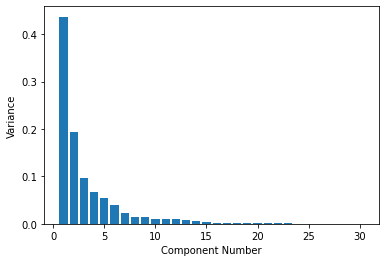

In [16]:
pca = PCA()
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

plt.ylabel('Variance')
plt.xlabel('Component Number')
plt.bar(np.arange(30) + 1, pca.explained_variance_ratio_)
plt.show()

In [17]:
print(pca.explained_variance_ratio_)

[4.36893153e-01 1.94151626e-01 9.66154484e-02 6.71661075e-02
 5.49883033e-02 4.01225718e-02 2.18306816e-02 1.48922601e-02
 1.37410827e-02 1.10137130e-02 1.04826288e-02 9.16214247e-03
 7.66306051e-03 5.14226331e-03 3.19635178e-03 2.51968451e-03
 1.92415148e-03 1.65844223e-03 1.49026749e-03 1.06777316e-03
 1.01725216e-03 8.48954816e-04 7.43492725e-04 5.81295611e-04
 5.44222785e-04 2.53545469e-04 2.14385701e-04 4.62967124e-05
 2.51158320e-05 3.72534805e-06]


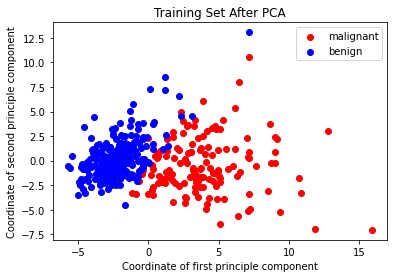

In [19]:
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)
x_train_reduced_malignant = np.array([x for x, y in zip(x_train_reduced, y_train) if y == 0])
x_train_reduced_benign = np.array([x for x, y in zip(x_train_reduced, y_train) if y == 1])

plt.scatter(*x_train_reduced_malignant.T, color='red')
plt.scatter(*x_train_reduced_benign.T, color='blue')
plt.title('Training Set After PCA')
plt.legend(['malignant', 'benign'])
plt.xlabel('Coordinate of first principle component')
plt.ylabel('Coordinate of second principle component')
plt.show()